In [10]:
import pandas as pd
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from streamlit_elements import nivo, elements, mui

In [12]:
df = pd.read_csv(f'../data/players.csv')

In [15]:
df.head()

,id,name,now_cost,position,team,web_name,transfers_in_event,influence_rank_type,news_added,ict_index_rank_type,...,now_cost_rank_type,ict_index,now_cost_rank,minutes,yellow_cards,cost_change_event_fall,red_cards,value_form,ict_index_rank,total_points
0,1,Folarin Balogun,44,FWD,Arsenal,Balogun,0,61,2023-08-31T08:55:15.272751Z,63,...,94,0.0,528,0,0,0,0,0.0,628,0
1,2,Cédric Alves Soares,39,DEF,Arsenal,Cédric,433,173,NaN,172,...,231,0.0,729,0,0,0,0,0.0,493,0
2,3,Mohamed Elneny,44,MID,Arsenal,M.Elneny,54,215,2023-12-12T22:30:08.433665Z,214,...,290,0.4,498,1,0,0,0,0.0,470,4
3,4,Fábio Ferreira Vieira,54,MID,Arsenal,Fábio Vieira,5,134,2023-12-07T12:00:08.489004Z,139,...,80,21.9,127,236,0,0,1,0.0,300,21
4,5,Gabriel dos Santos Magalhães,49,DEF,Arsenal,Gabriel,104278,42,2023-09-30T23:00:07.672676Z,47,...,31,43.3,247,1284,1,0,0,0.9,172,56


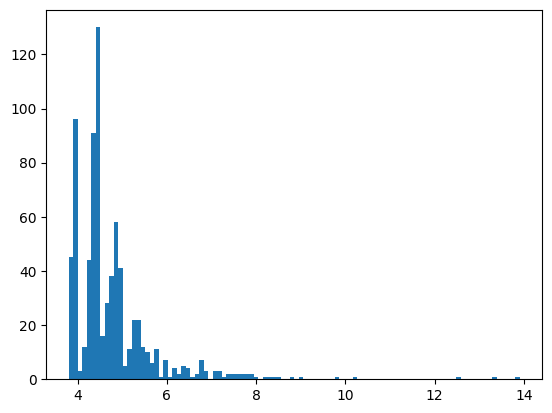

In [18]:
plt.hist(df.now_cost.values/10., bins=100);

In [16]:
df.columns

Index(['id', 'name', 'now_cost', 'position', 'team', 'web_name',
       'transfers_in_event', 'influence_rank_type', 'news_added',
       'ict_index_rank_type', 'assists', 'selected_rank',
       'direct_freekicks_order', 'starts_per_90', 'goals_conceded',
       'threat_rank_type', 'status', 'ep_this', 'news', 'selected_rank_type',
       'goals_scored', 'influence_rank', 'goals_conceded_per_90',
       'selected_by_percent', 'in_dreamteam', 'points_per_game_rank',
       'expected_goal_involvements_per_90', 'influence', 'form_rank_type',
       'expected_goals_conceded_per_90', 'chance_of_playing_this_round',
       'ep_next', 'expected_assists', 'expected_goals_conceded',
       'points_per_game', 'cost_change_start', 'transfers_in', 'starts',
       'cost_change_start_fall', 'creativity', 'saves_per_90', 'threat_rank',
       'penalties_saved', 'points_per_game_rank_type', 'own_goals', 'bonus',
       'penalties_missed', 'expected_goals', 'chance_of_playing_next_round',
       'eve

In [14]:
df.groupby('team').sum()['total_points'].reset_index().sort_values('total_points', ascending=False)

,team,total_points
0,Arsenal,935
10,Liverpool,904
14,Newcastle,887
17,Spurs,863
1,Aston Villa,840
12,Man City,826
9,Fulham,744
18,West Ham,739
6,Chelsea,739
13,Man Utd,730


In [ ]:
data = [
    {"id": "JavaScript", "label": "JavaScript", "value": 55},
    {"id": "Python", "label": "Python", "value": 75},
    {"id": "Java", "label": "Java", "value": 30},
    {"id": "C#", "label": "C#", "value": 20},
    {"id": "PHP", "label": "PHP", "value": 15}
]f

In [28]:
pie_data=[]
for i in range(df.shape[0]):
    # df.iloc[i]
    pie_data.append({"id": df.iloc[i]['name'], "label": df.iloc[i]['name'], "value": df.iloc[i]['now_cost']/10.})

In [29]:
pie_data

[{'id': 'Folarin Balogun',
  'label': 'Folarin Balogun',
  'value': np.float64(4.4)},
 {'id': 'Cédric Alves Soares',
  'label': 'Cédric Alves Soares',
  'value': np.float64(3.9)},
 {'id': 'Mohamed Elneny', 'label': 'Mohamed Elneny', 'value': np.float64(4.4)},
 {'id': 'Fábio Ferreira Vieira',
  'label': 'Fábio Ferreira Vieira',
  'value': np.float64(5.4)},
 {'id': 'Gabriel dos Santos Magalhães',
  'label': 'Gabriel dos Santos Magalhães',
  'value': np.float64(4.9)},
 {'id': 'Kai Havertz', 'label': 'Kai Havertz', 'value': np.float64(7.1)},
 {'id': 'Gabriel Fernando de Jesus',
  'label': 'Gabriel Fernando de Jesus',
  'value': np.float64(8.0)},
 {'id': 'Jorge Luiz Frello Filho',
  'label': 'Jorge Luiz Frello Filho',
  'value': np.float64(5.3)},
 {'id': 'Jakub Kiwior', 'label': 'Jakub Kiwior', 'value': np.float64(4.3)},
 {'id': 'Marcus Oliveira Alencar',
  'label': 'Marcus Oliveira Alencar',
  'value': np.float64(4.5)},
 {'id': 'Gabriel Martinelli Silva',
  'label': 'Gabriel Martinelli Sil

In [ ]:
df.sort_values()

In [82]:
df

,id,name,now_cost,position,team,web_name,transfers_in_event,influence_rank_type,news_added,ict_index_rank_type,...,now_cost_rank_type,ict_index,now_cost_rank,minutes,yellow_cards,cost_change_event_fall,red_cards,value_form,ict_index_rank,total_points
0,1,Folarin Balogun,44,FWD,Arsenal,Balogun,0,61,2023-08-31T08:55:15.272751Z,63,...,94,0.0,528,0,0,0,0,0.0,628,0
1,2,Cédric Alves Soares,39,DEF,Arsenal,Cédric,433,173,NaN,172,...,231,0.0,729,0,0,0,0,0.0,493,0
2,3,Mohamed Elneny,44,MID,Arsenal,M.Elneny,54,215,2023-12-12T22:30:08.433665Z,214,...,290,0.4,498,1,0,0,0,0.0,470,4
3,4,Fábio Ferreira Vieira,54,MID,Arsenal,Fábio Vieira,5,134,2023-12-07T12:00:08.489004Z,139,...,80,21.9,127,236,0,0,1,0.0,300,21
4,5,Gabriel dos Santos Magalhães,49,DEF,Arsenal,Gabriel,104278,42,2023-09-30T23:00:07.672676Z,47,...,31,43.3,247,1284,1,0,0,0.9,172,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,749,Matthew Whittingham,45,MID,Wolves,Whittingham,13,269,NaN,272,...,250,0.0,428,0,0,0,0,0.0,680,0
765,750,Tawanda Chirewa,45,MID,Wolves,Chirewa,20,277,NaN,280,...,258,0.0,441,0,0,0,0,0.0,693,0
766,751,Justin Hubner,40,DEF,Wolves,Hubner,151,217,NaN,217,...,211,0.0,703,0,0,0,0,0.0,579,0
767,769,Owen Hesketh,45,MID,Wolves,Hesketh,11,257,NaN,260,...,232,0.0,401,0,0,0,0,0.0,663,0


In [4]:
pca = PCA(2)

In [76]:
df_float = df.select_dtypes(include=['float64','int'])
df_float = df_float.iloc[:,1:] #drop ID
df_float = df_float.fillna(0.)

In [77]:
df_float

,now_cost,transfers_in_event,influence_rank_type,ict_index_rank_type,assists,selected_rank,direct_freekicks_order,starts_per_90,goals_conceded,threat_rank_type,...,now_cost_rank_type,ict_index,now_cost_rank,minutes,yellow_cards,cost_change_event_fall,red_cards,value_form,ict_index_rank,total_points
0,44,0,61,63,0,325,0.0,0.00,0,60,...,94,0.0,528,0,0,0,0,0.0,628,0
1,39,433,173,172,0,253,0.0,0.00,0,158,...,231,0.0,729,0,0,0,0,0.0,493,0
2,44,54,215,214,1,438,0.0,0.00,0,207,...,290,0.4,498,1,0,0,0,0.0,470,4
3,54,5,134,139,3,430,0.0,0.76,2,109,...,80,21.9,127,236,0,0,1,0.0,300,21
4,49,104278,42,47,0,21,0.0,0.98,13,24,...,31,43.3,247,1284,1,0,0,0.9,172,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,45,13,269,272,0,746,0.0,0.00,0,269,...,250,0.0,428,0,0,0,0,0.0,680,0
765,45,20,277,280,0,733,0.0,0.00,0,277,...,258,0.0,441,0,0,0,0,0.0,693,0
766,40,151,217,217,0,624,0.0,0.00,0,206,...,211,0.0,703,0,0,0,0,0.0,579,0
767,45,11,257,260,0,769,0.0,0.00,0,255,...,232,0.0,401,0,0,0,0,0.0,663,0


In [78]:
scaler = StandardScaler()

In [79]:
df_scaled = scaler.fit_transform(df_float)

In [80]:
comps = pca.fit_transform(df_scaled)

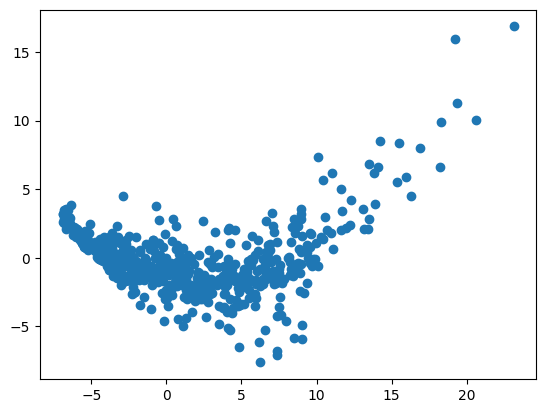

In [81]:
plt.scatter(comps[:,0], comps[:,1])
plt.show()